<a href="https://colab.research.google.com/github/mathcute/Data-Science---Projects/blob/main/Regress%C3%A3o_Linear_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from random import *
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

df = pd.read_csv('/content/atlas2010_recorte.csv', decimal = '.')
df

,uf,espvida,fectot,mort1,razdep,e_anosestudo
0,Rondonia,70.75,2.24,23.8,47.37,8.67
1,Rondonia,73.36,1.91,19.2,46.68,9.18
2,Rondonia,70.39,2.15,24.8,48.12,10.09
3,Rondonia,74.27,1.90,14.3,43.79,9.74
4,Rondonia,72.94,2.12,18.1,45.67,10.22
...,...,...,...,...,...,...
885,Piaui,69.57,2.67,29.2,59.93,7.94
886,Piaui,67.49,1.86,36.2,55.92,9.14
887,Piaui,66.10,2.45,41.5,55.68,8.50
888,Piaui,66.10,1.89,41.5,43.73,7.63


##Exibindo todas colunas

In [ ]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['uf', 'espvida', 'fectot', 'mort1', 'razdep', 'e_anosestudo']


##Modelo inicial de Regressao Linear

In [ ]:
model = sm.ols(formula = 'espvida ~ mort1 + fectot', data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                espvida   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.281e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:13:47   Log-Likelihood:                -373.23
No. Observations:                 890   AIC:                             752.5
Df Residuals:                     887   BIC:                             766.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.9067      0.074   1071.366      0.0

##Teste de Durbin-Watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

0.9998354492034647

In [ ]:
residuals = model.resid
residuo = 0

for i in range(len(residuals)):

  novo_residuo = residuals[i] * residuals[i]
  residuo_total = residuo + novo_residuo

residuo_total

0.08716773548833878

##Teste de Breusch-Godfrey

*O teste de Breusch-Godfrey é um teste
estatístico usado para verificar se os resíduos de uma regressão são
independentes entre si.
○ Se o p-valor for menor que o nível de significância que você
escolheu (geralmente 0,05 ou 0,01), você pode rejeitar a hipótese de
independência dos resíduos e concluir que há correlação serial nos
resíduos*

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

In [ ]:
# statistic

bp_test_statistic

16.47364087438431

In [ ]:
#p value

bp_test_pvalue

0.0002647246212994051

##**Modelo de Regressão com Efeitos Aleatórios**

*Esse modelo visa trabalhar o problema da autocorrelação entre observações. Para isso, você considera que os dados estão agrupados de alguma forma.*

In [ ]:
grupos = df['uf']
grupos

0      Rondonia
1      Rondonia
2      Rondonia
3      Rondonia
4      Rondonia
         ...   
885       Piaui
886       Piaui
887       Piaui
888       Piaui
889       Piaui
Name: uf, Length: 890, dtype: object

In [ ]:
from statsmodels.formula.api import mixedlm

mixed_model = mixedlm(formula = 'espvida ~ mort1 + fectot', groups = grupos, data = df)
result = mixed_model.fit()

print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: espvida 
No. Observations: 890     Method:             REML    
No. Groups:       9       Scale:              0.0433  
Min. group size:  15      Log-Likelihood:     100.7650
Max. group size:  224     Converged:          Yes     
Mean group size:  98.9                                
------------------------------------------------------
          Coef.  Std.Err.    z     P>|z| [0.025 0.975]
------------------------------------------------------
Intercept 79.156    0.148  533.166 0.000 78.865 79.447
mort1     -0.329    0.001 -219.491 0.000 -0.332 -0.326
fectot    -0.059    0.017   -3.497 0.000 -0.092 -0.026
Group Var  0.174    0.423                             



In [ ]:
residual = result.resid
residuo = 0

for i in range(len(residual)):

  novo_residuo = residual[i] * residual[i]
  residuo_total_nm = residuo + novo_residuo

residuo_total_nm

0.017058247946889333

# *Análise da normalidade dos resíduos*

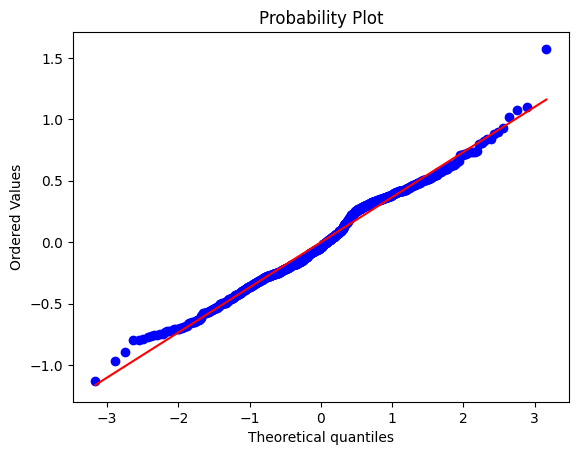

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist = 'norm', plot = plt)

plt.show()

*Para interpretar visualmente um gráfico Q-Q plot de normalidade dos resíduos, você deve olhar para a linha de tendência no gráfico. Se os resíduos seguirem aproximadamente uma distribuição normal, os pontos no gráfico devem seguir uma linha reta. Se os pontos estiverem muito distante da linha reta, isso pode indicar que a distribuição dos resíduos é diferente da distribuição normal.*

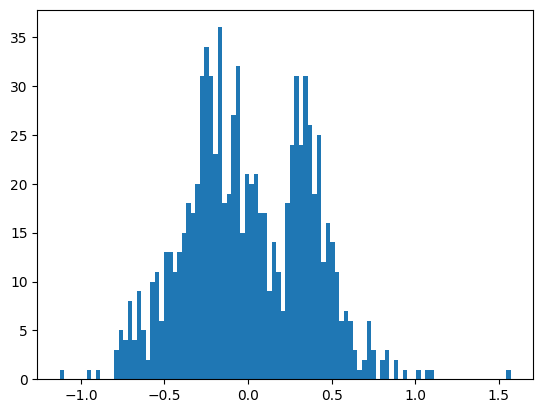

In [ ]:
#histograma

import matplotlib.pyplot as plt

plt.hist(residuals, bins = 100)

plt.show()

In [ ]:
entrada = df[['mort1', 'fectot']]
entrada

,mort1,fectot
0,23.8,2.24
1,19.2,1.91
2,24.8,2.15
3,14.3,1.90
4,18.1,2.12
...,...,...
885,29.2,2.67
886,36.2,1.86
887,41.5,2.45
888,41.5,1.89


##Suponha que você tenha os resíduos da regressão em um array chamado residuals e os valores previstos pelo modelo em um array chamado predicted

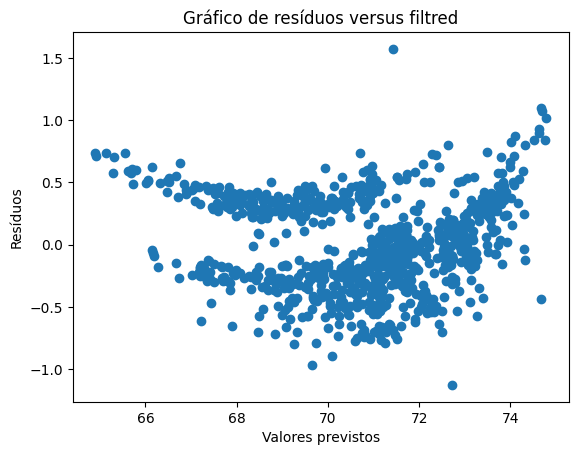

In [ ]:
import matplotlib.pyplot as plt

predicted = model.predict(entrada)

plt.scatter(predicted, residuals)

plt.title('Gráfico de resíduos versus filtred')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')

plt.show()

##**Teste de Shapiro-Wilk**

In [ ]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)

alpha = 0.05

#verificar se o p-value é menor que o nivel de significancia (alpha)

if(p_value > alpha):

  print('Não podemos rejeitar a hipótese nula de que os dados são normalmente distribuidos')

else:

  print('Rejeitamos a hipótese nula de que os dados são normalmente distribuidos')


Rejeitamos a hipótese nula de que os dados são normalmente distribuidos


In [ ]:
p_value

1.9324756976857316e-06

##**Teste de Anderson Darling**

*Este teste visa verificar se os dados seguem uma distriuição específica. Ou a normal ou a t student, conforme especificado no teste. O teste é então aplicado aos dados e gera um p-valor, que indica a probabilidade de os dados terem sido gerados por essa distribuição. Se o p-valor for baixo (geralmente abaixo de 0,05), isso indica que os dados não são compatíveis com a distribuição teórica e, portanto, não seguem essa distribuição.*

In [ ]:
#metodo para t student

from scipy.stats import anderson_ksamp

statistic, critical_values, p_value = anderson_ksamp([residuals, np.random.standard_t(df=len(residuals)-2, size=len(residuals))])
print(p_value)

0.001


<ipython-input-22-7d47173ca543>:5: UserWarning: p-value floored: true value smaller than 0.001
  statistic, critical_values, p_value = anderson_ksamp([residuals, np.random.standard_t(df=len(residuals)-2, size=len(residuals))])


In [ ]:
#Para normal

from scipy.stats import anderson_ksamp
from numpy.random import normal

statistic, critical_values, p_value = anderson_ksamp([residuals, normal(size = len(residuals))])

print(p_value)


0.001


<ipython-input-23-5cb83cd3c677>:6: UserWarning: p-value floored: true value smaller than 0.001
  statistic, critical_values, p_value = anderson_ksamp([residuals, normal(size = len(residuals))])


##**Teste de aderência de Kolmogorov-Smirnov**

*É um teste não paramétrico que verifica se um conjunto de dados segue uma determinada distribuição. Ele é baseado na comparação da função de distribuição acumulada dos dados com a função de distribuição acumulada da distribuição teórica que está sendo testada. Se as duas funções são muito diferentes, isso indica que os dados não seguem a distribuição teórica.*

In [ ]:
#Testando se os resíduos seguem uma distiruição gama

from scipy.stats import kstest
from scipy.stats import gamma

#Calculando os parâmetros da distribuição gama a partir de dados

shape, _, scale = gamma.fit(residuals)

#Realizando o teste de Kolmogorov-Smirnov para a distribuição gama

statistic, p_value = kstest(residuals, 'gamma', args = (shape, 0, scale))

print(p_value)

0.0


Se o p_value for maior que o nível de significância, isso indica que os dados são compatíveis com a distribuição testada (Kolmogorov-Smirnov)

##**Resíduos seguem variância constante**

#Teste de Goldfeld-Quandt

In [ ]:
import statsmodels.api as sm1
from statsmodels.regression.linear_model import OLS

_, pval, _ = sm1.stats.diagnostic.het_goldfeldquandt(residuals, model.model.exog)

print(pval)

0.9997223385845706


*O valor p do teste de Goldfeld-Quandt é usado para avaliar a hipótese nula de que os resíduos de um modelo de regressão têm variância constante. Se o valor p for menor do que o nível de significância escolhido (geralmente 0,05 ou 0,01), isso significa que a hipótese nula é rejeitada e que é provável que os resíduos não tenham variância constante. Isso indica que pode ser necessário ajustar ou substituir o modelo de regressão para melhor ajustar os dados.*

*Se o valor p for maior do que o nível de significância escolhido, isso significa que a hipótese nula de variância constante dos resíduos não é rejeitada. Isso sugere que os resíduos têm variância constante e que o modelo de regressão atual pode ser adequado para os dados.*

##**Verificando ausência de multicolinearidade**

#Método 1 - Correlação entre variáveis independentes

In [ ]:
#Calculando a correlação

from scipy.stats import spearmanr

corr, pval = spearmanr(df['fectot'], df['mort1'])

In [ ]:
corr

0.11017263789182423

In [ ]:
pval

0.0009941638016439814

#Método 2 - Teste de Variância inflaction factor (VIF)

In [ ]:
#Calculando o VIF

vif = 1 / (1 - model.rsquared)

In [ ]:
print(vif)

29.875860777588468


*Se o VIF for superior a 5 ou 10 (que é o meu caso nesse modelo), isso pode indicar multicolinearidade e você pode considerar remover uma das variáveis independentes do modelo ou usar técnicas de regularização para lidar com a multicolinearidade.*

*Essa diferença, entre 5 ou 10, é derivada de divergências na literatura.*